<a href="https://colab.research.google.com/github/Longsieunhan/IA-Project/blob/master/handwrittenrecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load MNIST dataset


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


# Normalize the data


In [ ]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [ ]:
# Normalize the data
X_train, X_test = X_train / 255.0, X_test / 255.0



In [ ]:
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [ ]:
print(X_train.min(), X_train.max())

0.0 1.0


# Split into training and validation sets


In [ ]:
# Split into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train)

###Visualize Sample Data



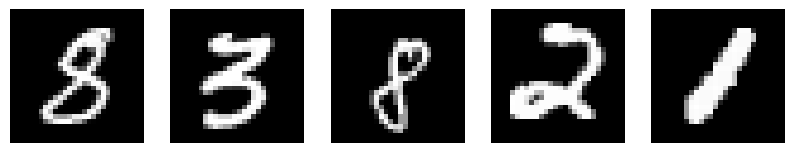

In [ ]:
# Visualize some samples
fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i, ax in enumerate(axes):
    ax.imshow(X_train[i], cmap='gray')
    ax.axis('off')
plt.show()


# Define input shape
input_shape = (28, 28)


In [ ]:
# Model 1: Simple Dense Network
model_1 = keras.Sequential([
    layers.Flatten(input_shape=input_shape),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

#A simple model with one hidden layer (128 neurons, ReLU activation).
#The output layer has 10 neurons (one per class) with softmax activation.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Model 2: Deeper Network
model_2 = keras.Sequential([
    layers.Flatten(input_shape=input_shape),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(10, activation='softmax')
])

#Adds an extra hidden layer (256 neurons → 128 neurons → output layer).


In [ ]:
# Model 3:  deeper
model_3 = keras.Sequential([
    layers.Flatten(input_shape=input_shape),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

#Uses 512 neurons in the first layer and 256 neurons in the second layer.


###Compile & Train with Different Optimizers


In [ ]:

# Compile models
models = [model_1, model_2, model_3]
optimizers = ['sgd', 'adam']
histories = {}

for i, model in enumerate(models):
    for opt in optimizers:
        model.compile(
            optimizer=opt,
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
        )
        early_stopping = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

        history = model.fit(
            X_train, y_train,
            validation_data=(X_valid, y_valid),
            batch_size=512,
            epochs=20,
            callbacks=[early_stopping]
        )
        histories[f'model_{i+1}_{opt}'] = history

Epoch 1/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.3045 - loss: 2.1248 - val_accuracy: 0.6625 - val_loss: 1.5782
Epoch 2/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6941 - loss: 1.4449 - val_accuracy: 0.7733 - val_loss: 1.1235
Epoch 3/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7801 - loss: 1.0592 - val_accuracy: 0.8111 - val_loss: 0.8803
Epoch 4/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8165 - loss: 0.8445 - val_accuracy: 0.8280 - val_loss: 0.7429
Epoch 5/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8347 - loss: 0.7258 - val_accuracy: 0.8414 - val_loss: 0.6566
Epoch 6/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8495 - loss: 0.6461 - val_accuracy: 0.8497 - val_loss: 0.5975
Epoch 7/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8573 - loss: 0.5927 - val_accuracy: 0.8577 - val_loss: 0.5542
Epoch 8/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8638 - loss: 0.5510 - val_accuracy: 0.8643 - val_loss

In [ ]:
import sklearn
import numpy as np
import seaborn as sns

pred = model_1.predict(X_test)
output_class = pred.argmax(axis=1)


print(pred[0])
print(output_class[0])



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
[5.1226777e-07 1.0802588e-09 2.0495880e-05 4.9568136e-04 7.7201429e-10
 2.8040125e-07 4.7079862e-12 9.9945414e-01 3.6133931e-06 2.5392661e-05]
7


In [ ]:
pred[0]

array([5.1226777e-07, 1.0802588e-09, 2.0495880e-05, 4.9568136e-04,
       7.7201429e-10, 2.8040125e-07, 4.7079862e-12, 9.9945414e-01,
       3.6133931e-06, 2.5392661e-05], dtype=float32)

# Plot accuracy and loss


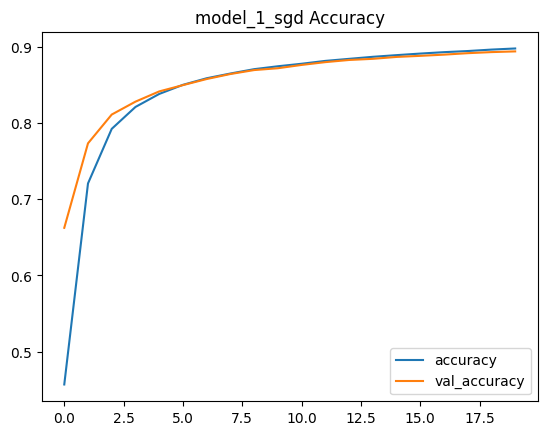

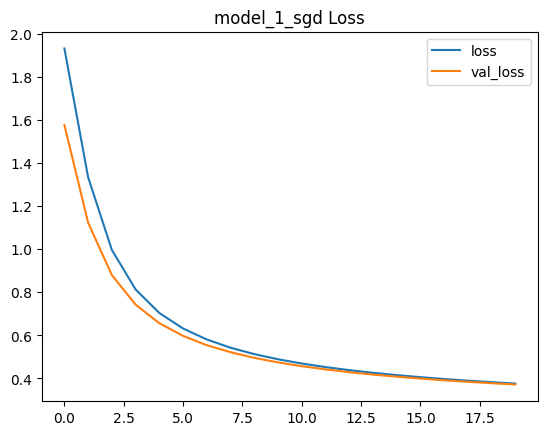

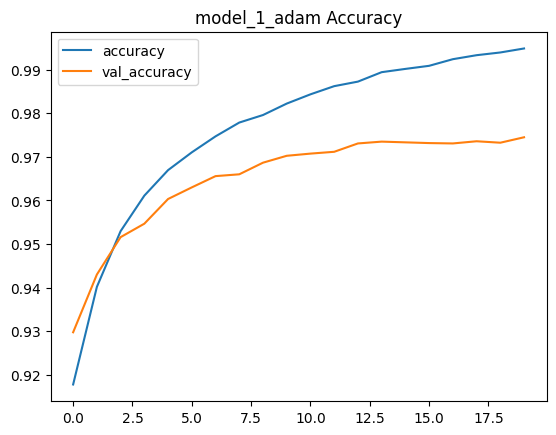

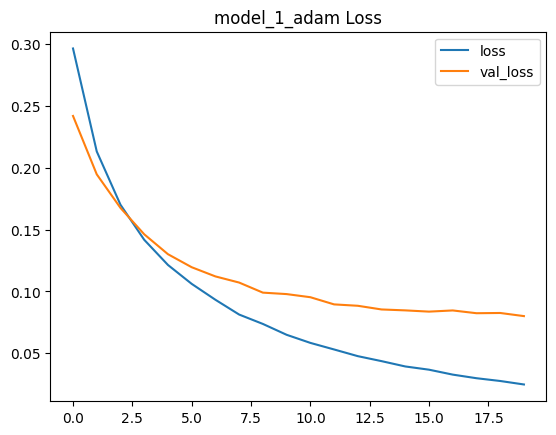

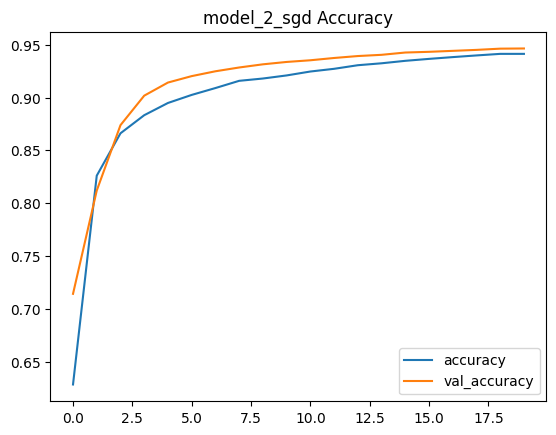

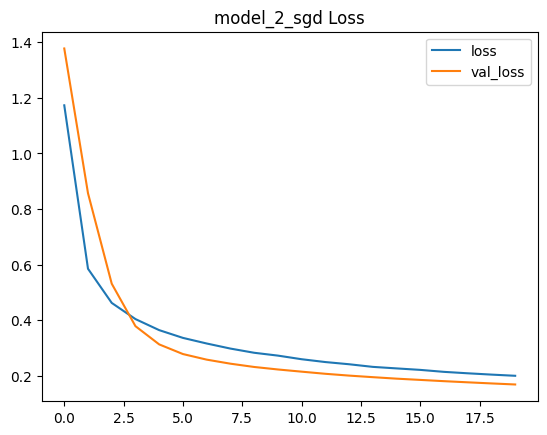

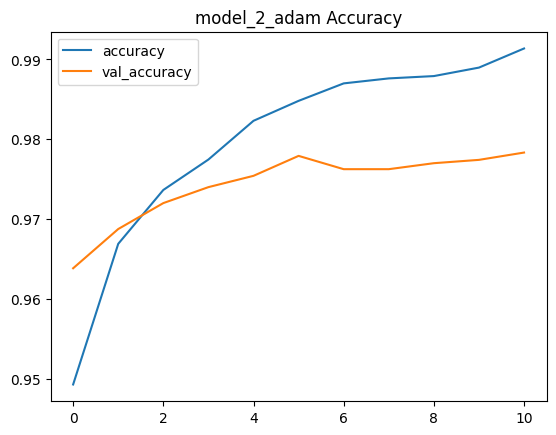

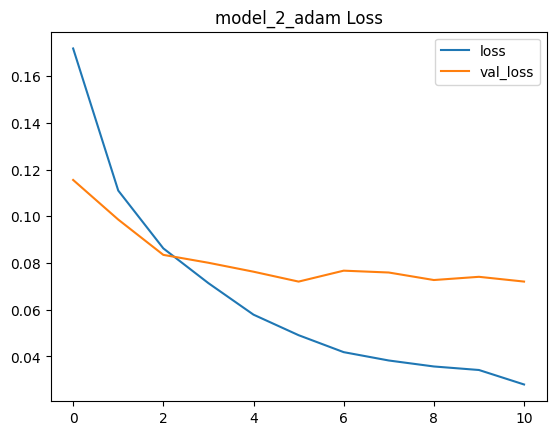

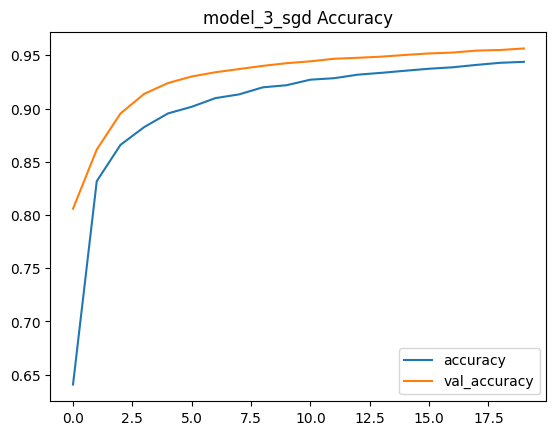

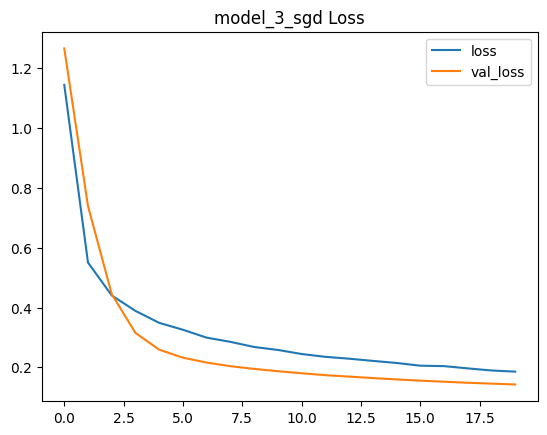

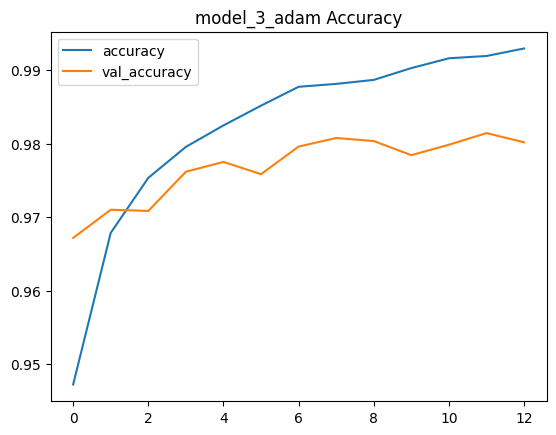

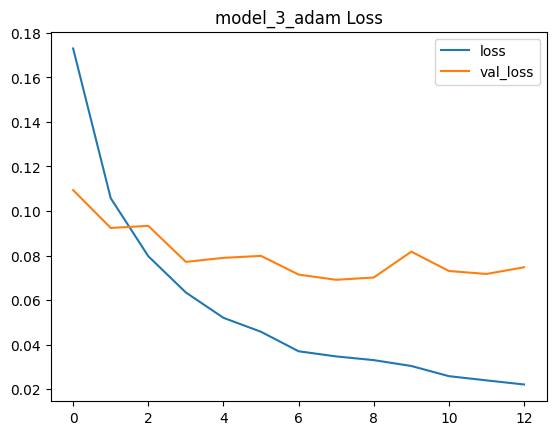

In [ ]:
# Plot accuracy and loss
for key, history in histories.items():
    history_df = pd.DataFrame(history.history)
    history_df[['accuracy', 'val_accuracy']].plot(title=f"{key} Accuracy")
    history_df[['loss', 'val_loss']].plot(title=f"{key} Loss")
    plt.show()

Based on the graph, it is observed that the graph of model 1 is overfitting, which is resulted by fewer neurons and layers. When it comes to adam and sgd, it can be seen that sgd is more accurate in predicting the data because the accuracy rate is higher and loss function is lower shown in the graph. As the model is updated (from 1 to 2, from 2 to 3), we can see that the graph is less overfitting showing through the

In [ ]:
# Evaluate on test set
for key, model in zip(histories.keys(), models):
    test_loss, test_acc = model.evaluate(X_test, y_test)
    print(f"{key} - Test Accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9726 - loss: 0.0851
model_1_sgd - Test Accuracy: 0.9776
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9725 - loss: 0.0869
model_1_adam - Test Accuracy: 0.9780
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9779 - loss: 0.0808
model_2_sgd - Test Accuracy: 0.9818


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


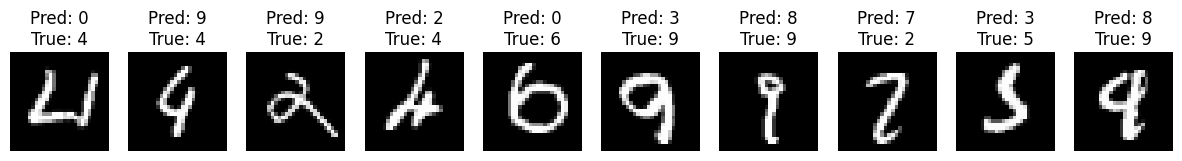

In [ ]:
# Visualizing incorrect predictions
import numpy as np
preds = models[1].predict(X_test).argmax(axis=1)
incorrect_indices = np.where(preds != y_test)[0][:10]

fig, axes = plt.subplots(1, 10, figsize=(15, 2))
for i, ax in enumerate(axes):
    ax.imshow(X_test[incorrect_indices[i]], cmap='gray')
    ax.set_title(f"Pred: {preds[incorrect_indices[i]]}\nTrue: {y_test[incorrect_indices[i]]}")
    ax.axis('off')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


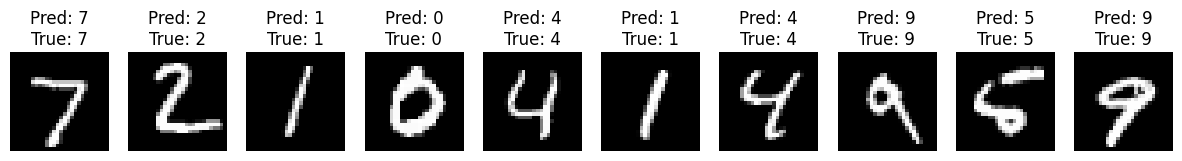

In [ ]:
# Visualizing  predictions
import numpy as np
preds = models[2].predict(X_test).argmax(axis=1)
correct_indices = np.where(preds == y_test)[0][:10]

fig, axes = plt.subplots(1, 10, figsize=(15, 2))
for i, ax in enumerate(axes):
    ax.imshow(X_test[correct_indices[i]], cmap='gray')
    ax.set_title(f"Pred: {preds[correct_indices[i]]}\nTrue: {y_test[correct_indices[i]]}")
    ax.axis('off')
plt.show()

In [ ]:
# Flatten images for standard NN
x_train_flat = X_train.reshape(-1, 28 * 28)
x_test_flat = X_test.reshape(-1, 28 * 28)


In [ ]:
# Define a standard neural network model
nn_model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(28*28,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

nn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Flatten images for standard NN
x_train_flat = X_train.reshape(-1, 28 * 28)
x_test_flat = X_test.reshape(-1, 28 * 28)


In [ ]:
# Train the standard NN
nn_model.fit(x_train_flat, y_train, epochs=10, validation_data=(x_test_flat, y_test))

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8746 - loss: 0.4445 - val_accuracy: 0.9561 - val_loss: 0.1407
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9641 - loss: 0.1157 - val_accuracy: 0.9698 - val_loss: 0.1011
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9766 - loss: 0.0774 - val_accuracy: 0.9683 - val_loss: 0.1012
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9833 - loss: 0.0543 - val_accuracy: 0.9745 - val_loss: 0.0853
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9865 - loss: 0.0415 - val_accuracy: 0.9760 - val_loss: 0.0820
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9905 - loss: 0.0300 - val_accuracy: 0.9743 - val_loss: 0.0949
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9916 - loss: 0.0256 - val_accuracy: 0.9738 - val_loss: 0.0916
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9924 - loss: 0.0235

In [ ]:
# Save the NN model weights
nn_model.save_weights("mnist_nn.weights.h5")

# Define a CNN model
cnn_model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Reshape data for CNN
x_train_cnn = X_train.reshape(-1, 28, 28, 1)
x_test_cnn = X_test.reshape(-1, 28, 28, 1)

In [ ]:
# Train the CNN
cnn_model.fit(x_train_cnn, y_train, epochs=10, validation_data=(x_test_cnn, y_test))


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.8981 - loss: 0.3367 - val_accuracy: 0.9809 - val_loss: 0.0602
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 46s 31ms/step - accuracy: 0.9836 - loss: 0.0531 - val_accuracy: 0.9870 - val_loss: 0.0366
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 29ms/step - accuracy: 0.9900 - loss: 0.0326 - val_accuracy: 0.9892 - val_loss: 0.0336
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 47s 31ms/step - accuracy: 0.9924 - loss: 0.0233 - val_accuracy: 0.9900 - val_loss: 0.0311
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 45s 30ms/step - accuracy: 0.9953 - loss: 0.0150 - val_accuracy: 0.9905 - val_loss: 0.0283
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 30ms/step - accuracy: 0.9959 - loss: 0.0124 - val_accuracy: 0.9896 - val_loss: 0.0341
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 29ms/step - accuracy: 0.9964 - loss: 0.0103 - val_accuracy: 0.9877 - val_loss: 0.0459
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9971 -

In [ ]:
# Save the CNN model weights
cnn_model.save_weights("mnist_cnn.weights.h5")

In [ ]:
# Compare models
print("\nStandard NN Model Summary:")
nn_model.summary()
print("\nCNN Model Summary:")
cnn_model.summary()


Standard NN Model Summary:


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 328,160 (1.25 MB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 218,774 (854.59 KB)


CNN Model Summary:


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 675,104 (2.58 MB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 450,070 (1.72 MB)